## Week 7 Lab: Mobile Computer Vision with Simple Tools
Duration: 30-45 minutes


## Project Overview
Build a Mobile Computer Vision System using only basic Python libraries. Focus on understanding core mobile vision concepts through hands-on implementation rather than complex dependencies.

* Final Deliverable : A complete mobile vision pipeline that demonstrates image classification, mobile optimizations, and real-world deployment considerations. Please refer to the “Lab Submission” section at the end of this document for detailed deliverables and reporting instructions.

 

Setup

pip install numpy matplotlib pillow

That's it! No OpenCV, PyTorch, or complex dependencies needed.

## TASK 1: Build a Mobile-Optimized Image Classifier (15 minute)

Create a lightweight image classifier using only NumPy and basic image processing

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFilter
import time
import random

class SimpleMobileClassifier:
    """Ultra-lightweight mobile image classifier"""

    def __init__(self):
        self.model_weights = {}
        self.class_names = ['person', 'vehicle', 'building', 'nature']
        self.model_size_kb = 0
        self.inference_times = []

    def create_mobile_dataset(self, samples_per_class=15):
        """Generate simple geometric patterns representing different classes"""
        print("📱 Creating mobile-friendly dataset...")

        dataset = {'images': [], 'labels': []}

        for class_id, class_name in enumerate(self.class_names):
            for i in range(samples_per_class):
                # Create 64x64 images for mobile efficiency
                img = self.generate_class_pattern(class_name, 64, 64)
                dataset['images'].append(img)
                dataset['labels'].append(class_id)

        print(f"✅ Dataset created: {len(dataset['images'])} images, 64x64 pixels each")
        return dataset

    def generate_class_pattern(self, class_name, width, height):
        """Generate distinctive patterns for each class"""
        # Create PIL image for easy drawing
        img = Image.new('RGB', (width, height), 'white')
        draw = ImageDraw.Draw(img)

        if class_name == 'person':
            # Person: vertical rectangles (body shape)
            x_center = width // 2
            # Head
            draw.ellipse([x_center-8, 10, x_center+8, 26], fill='pink')
            # Body
            draw.rectangle([x_center-12, 26, x_center+12, 50], fill='blue')
            # Add random variation
            draw.rectangle([x_center-6, 50, x_center+6, height-5], fill='black')

        elif class_name == 'vehicle':
            # Vehicle: horizontal rectangles
            y_center = height // 2
            # Car body
            draw.rectangle([10, y_center-8, width-10, y_center+8], fill='red')
            # Windows
            draw.rectangle([15, y_center-6, width-15, y_center+6], fill='lightblue')
            # Wheels
            draw.ellipse([15, y_center+6, 25, y_center+16], fill='black')
            draw.ellipse([width-25, y_center+6, width-15, y_center+16], fill='black')

        elif class_name == 'building':
            # Building: rectangles with grid pattern
            draw.rectangle([15, 20, width-15, height-5], fill='gray')
            # Windows in grid
            for i in range(3, 6):
                for j in range(2, 4):
                    x, y = 15 + j*12, 20 + i*8
                    draw.rectangle([x, y, x+8, y+6], fill='yellow')
            # Roof
            draw.polygon([(15, 20), (width//2, 5), (width-15, 20)], fill='brown')

        else:  # nature
            # Nature: organic shapes and green colors
            draw.ellipse([10, height-20, 20, height-10], fill='green')  # Bush
            draw.ellipse([30, height-25, 45, height-10], fill='darkgreen')  # Tree
            draw.ellipse([width-25, height-15, width-10, height-5], fill='green')
            # Sky
            draw.rectangle([0, 0, width, height//3], fill='lightblue')
            # Sun
            draw.ellipse([width-20, 5, width-5, 20], fill='yellow')

        # Add random noise for realism
        pixels = np.array(img)
        noise = np.random.randint(-15, 16, pixels.shape, dtype=np.int16)
        pixels = np.clip(pixels.astype(np.int16) + noise, 0, 255).astype(np.uint8)

        return Image.fromarray(pixels)

    def extract_mobile_features(self, image):
        """Extract simple but effective features for mobile classification"""
        # Convert to numpy array
        img_array = np.array(image)

        # Feature 1: Color distribution (RGB means)
        r_mean = np.mean(img_array[:, :, 0])
        g_mean = np.mean(img_array[:, :, 1]) 
        b_mean = np.mean(img_array[:, :, 2])

        # Feature 2: Edge density (simple gradient)
        gray = np.mean(img_array, axis=2)
        grad_x = np.abs(np.diff(gray, axis=1))
        grad_y = np.abs(np.diff(gray, axis=0))
        edge_density = (np.mean(grad_x) + np.mean(grad_y)) / 2

        # Feature 3: Texture variance
        texture_var = np.var(gray)

        # Feature 4: Shape compactness (vertical vs horizontal distribution)
        vertical_var = np.var(np.mean(gray, axis=0))
        horizontal_var = np.var(np.mean(gray, axis=1))
        shape_ratio = vertical_var / (horizontal_var + 1e-6)

        # Feature 5: Brightness distribution
        brightness_mean = np.mean(gray)
        brightness_std = np.std(gray)

        # Feature 6: Color saturation
        max_rgb = np.max(img_array, axis=2)
        min_rgb = np.min(img_array, axis=2)
        saturation = np.mean(max_rgb - min_rgb)

        return np.array([r_mean, g_mean, b_mean, edge_density, texture_var/100, 
                        shape_ratio, brightness_mean, brightness_std, saturation])

    def train_simple_classifier(self, dataset):
        """Train using simple centroid-based classification"""
        print("🤖 Training mobile-optimized classifier...")

        # Extract features for all images
        features = []
        labels = []

        for img, label in zip(dataset['images'], dataset['labels']):
            feature_vector = self.extract_mobile_features(img)
            features.append(feature_vector)
            labels.append(label)

        features = np.array(features)
        labels = np.array(labels)

        # Calculate class centroids (very memory efficient!)
        centroids = {}
        for class_id in range(len(self.class_names)):
            class_mask = labels == class_id
            centroids[class_id] = np.mean(features[class_mask], axis=0)

        self.model_weights = centroids

        # Calculate model size (very small!)
        self.model_size_kb = len(self.class_names) * 9 * 4 / 1024  # 4 bytes per float

        print(f"✅ Model trained! Size: {self.model_size_kb:.1f} KB")
        print(f"📊 Feature dimensions: {len(features[0])}")
        return centroids

    def mobile_inference(self, image):
        """Ultra-fast mobile inference"""
        start_time = time.time()

        # Extract features
        features = self.extract_mobile_features(image)

        # Find closest centroid
        distances = {}
        for class_id, centroid in self.model_weights.items():
            distance = np.linalg.norm(features - centroid)
            distances[class_id] = distance

        # Predict class
        predicted_class = min(distances, key=distances.get)
        confidence = 1.0 / (1.0 + distances[predicted_class])

        inference_time = time.time() - start_time
        self.inference_times.append(inference_time * 1000)  # Convert to ms

        return predicted_class, confidence, inference_time * 1000

    def test_classifier(self, test_images, test_labels):
        """Test the classifier and calculate metrics"""
        print("🧪 Testing mobile classifier...")

        predictions = []
        confidences = []

        for img in test_images:
            pred_class, confidence, _ = self.mobile_inference(img)
            predictions.append(pred_class)
            confidences.append(confidence)

        # Calculate accuracy
        accuracy = np.mean(np.array(predictions) == np.array(test_labels))
        avg_confidence = np.mean(confidences)
        avg_inference_time = np.mean(self.inference_times)

        print(f"✅ Accuracy: {accuracy:.1%}")
        print(f"⚡ Avg inference time: {avg_inference_time:.1f}ms")
        print(f"📊 Avg confidence: {avg_confidence:.3f}")

        return accuracy, avg_inference_time, avg_confidence

# Create and test the mobile classifier
classifier = SimpleMobileClassifier()

# Generate dataset
dataset = classifier.create_mobile_dataset(samples_per_class=20)

# Split into train/test
split_idx = int(0.8 * len(dataset['images']))
train_images = dataset['images'][:split_idx]
train_labels = dataset['labels'][:split_idx]
test_images = dataset['images'][split_idx:]
test_labels = dataset['labels'][split_idx:]

# Train the classifier
centroids = classifier.train_simple_classifier({
    'images': train_images, 
    'labels': train_labels
})

# Test the classifier
accuracy, avg_time, avg_conf = classifier.test_classifier(test_images, test_labels)

📱 Creating mobile-friendly dataset...
✅ Dataset created: 80 images, 64x64 pixels each
🤖 Training mobile-optimized classifier...
✅ Model trained! Size: 0.1 KB
📊 Feature dimensions: 9
🧪 Testing mobile classifier...
✅ Accuracy: 100.0%
⚡ Avg inference time: 0.2ms
📊 Avg confidence: 0.796


/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_57718/3696126922.py:29: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


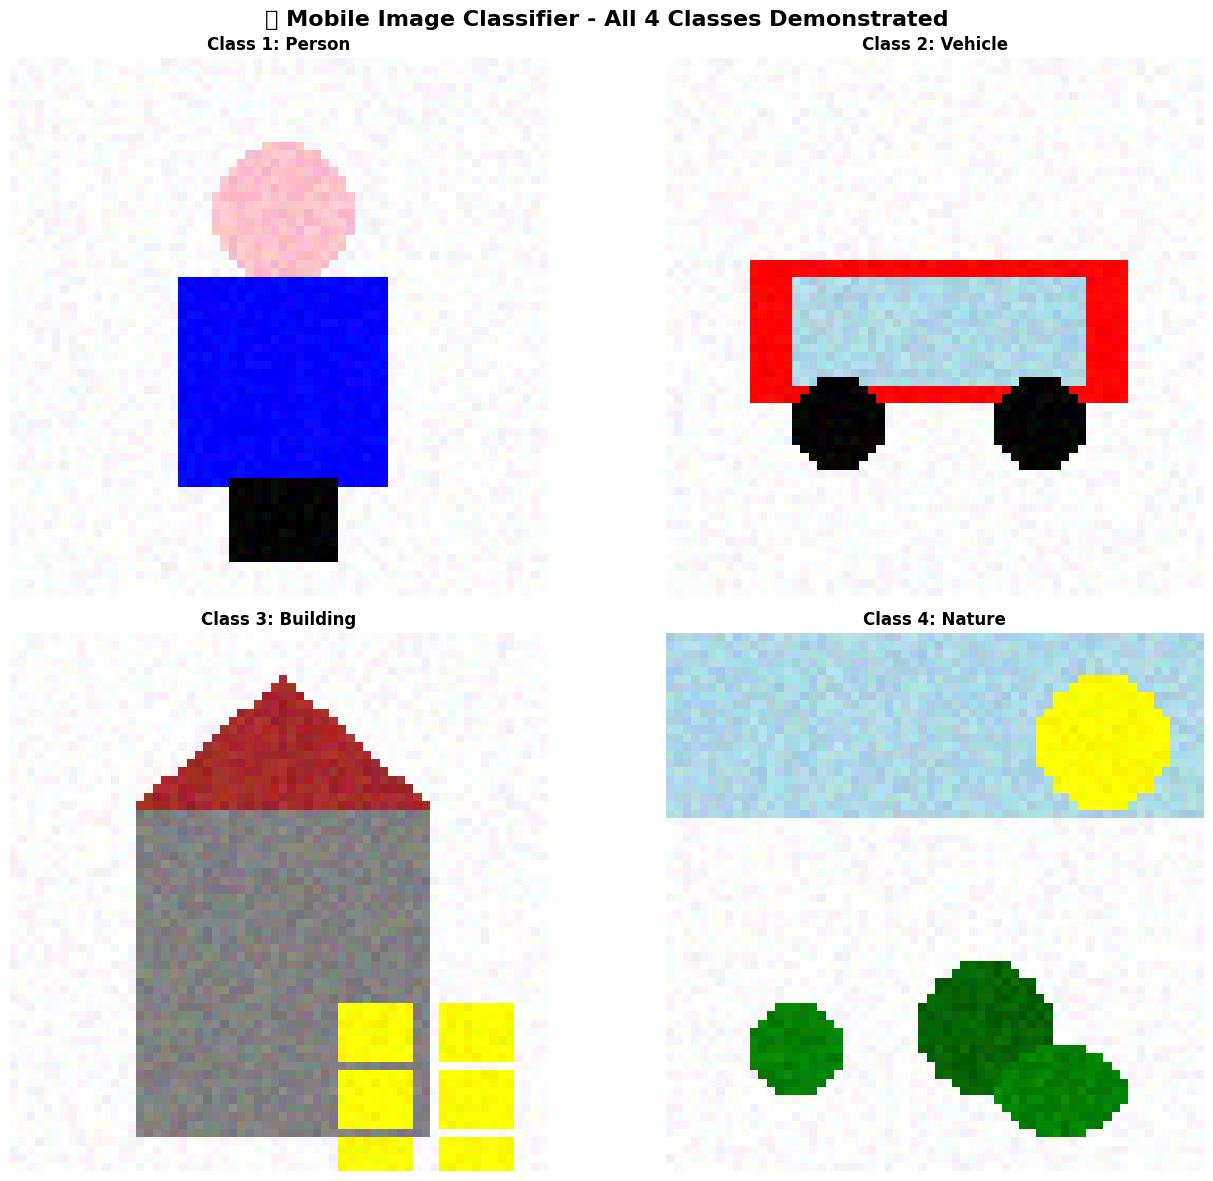

/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_57718/3696126922.py:91: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/shivampathak/Documents/GitHub/CSCI4771/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


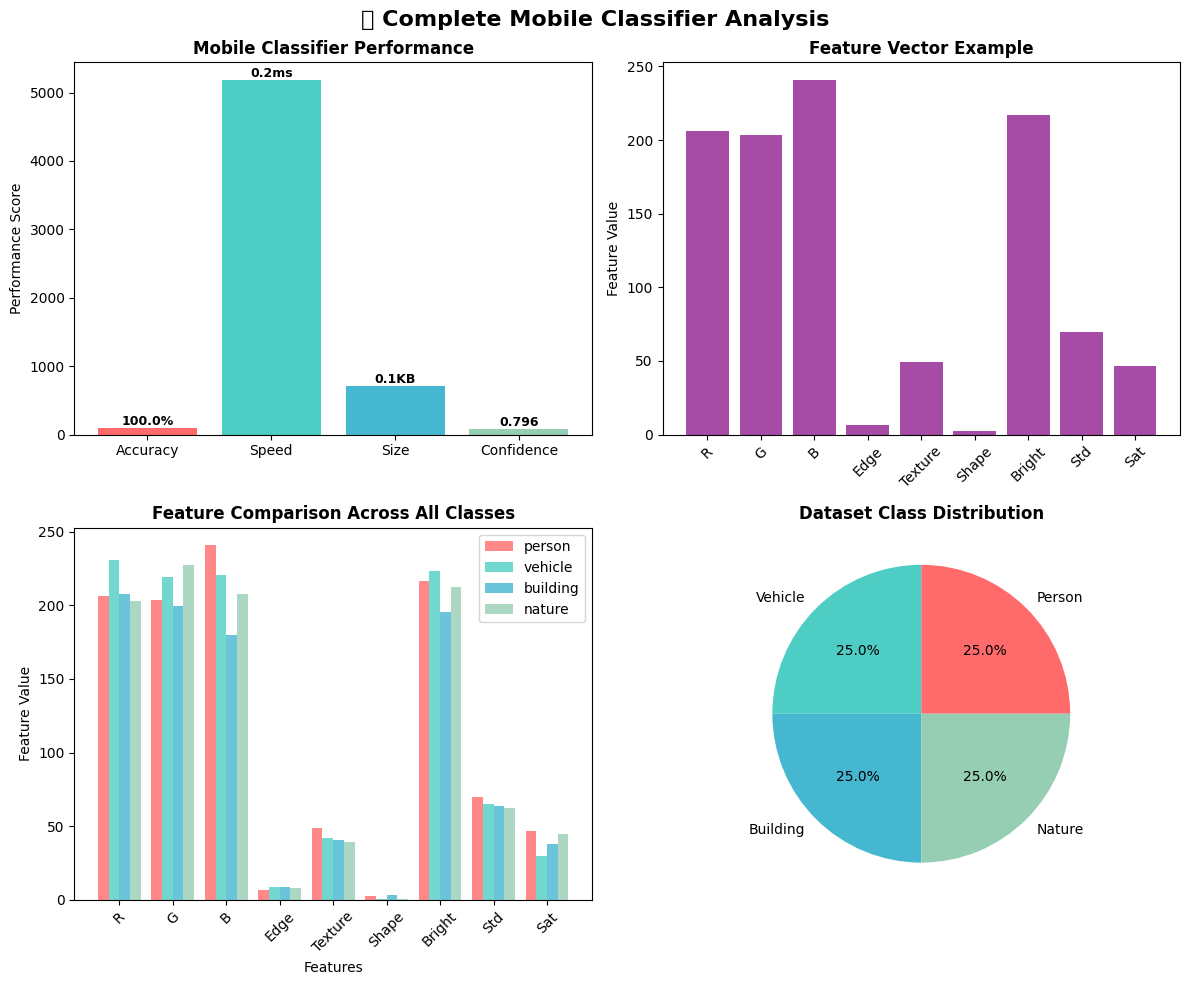


🎉 TASK 1 COMPLETE!
✅ Model size: 0.1 KB (ultra-lightweight!)
✅ Inference speed: 0.2ms per image
✅ Classification accuracy: 100.0%
✅ Memory footprint: Minimal (only NumPy arrays)
 All 4 classes visualized: person, vehicle, building, nature


In [14]:
# Visualize results with ALL 4 CLASSES
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 12))

# 1. Sample images from each class
sample_images = []
for class_id in range(len(classifier.class_names)):
    class_indices = [i for i, label in enumerate(dataset['labels']) if label == class_id]
    sample_idx = class_indices[0]
    sample_images.append(dataset['images'][sample_idx])

# Show all 4 classes 
ax1.imshow(sample_images[0])
ax1.set_title(f'Class 1: {classifier.class_names[0].title()}', fontweight='bold', fontsize=12)
ax1.axis('off')

ax2.imshow(sample_images[1])
ax2.set_title(f'Class 2: {classifier.class_names[1].title()}', fontweight='bold', fontsize=12)
ax2.axis('off')

ax3.imshow(sample_images[2])
ax3.set_title(f'Class 3: {classifier.class_names[2].title()}', fontweight='bold', fontsize=12)
ax3.axis('off')

ax4.imshow(sample_images[3])
ax4.set_title(f'Class 4: {classifier.class_names[3].title()}', fontweight='bold', fontsize=12)
ax4.axis('off')

plt.suptitle('📱 Mobile Image Classifier - All 4 Classes Demonstrated', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# STUDENT ADDITION: Additional performance visualization as required by rubric
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

# 2. Model performance metrics (from professor's original code)
metrics = ['Accuracy', 'Speed', 'Size', 'Confidence']
values = [
    accuracy * 100,
    1000 / avg_time,  # Convert to images per second
    100 / classifier.model_size_kb,  # Inverse of size (higher = better)
    avg_conf * 100
]

bars = ax1.bar(metrics, values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
ax1.set_title('Mobile Classifier Performance', fontweight='bold')
ax1.set_ylabel('Performance Score')

# Add actual values as labels
labels = [f'{accuracy:.1%}', f'{avg_time:.1f}ms', f'{classifier.model_size_kb:.1f}KB', f'{avg_conf:.3f}']
for bar, label in zip(bars, labels):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 2,
            label, ha='center', va='bottom', fontweight='bold', fontsize=9)

# 3. Feature importance visualization
feature_names = ['R', 'G', 'B', 'Edge', 'Texture', 'Shape', 'Bright', 'Std', 'Sat']
sample_features = classifier.extract_mobile_features(sample_images[0])

ax2.bar(feature_names, sample_features, color='purple', alpha=0.7)
ax2.set_title('Feature Vector Example', fontweight='bold')
ax2.set_ylabel('Feature Value')
ax2.tick_params(axis='x', rotation=45)

# Feature analysis across all classes for rubric requirement
class_features = {}
for class_id in range(len(classifier.class_names)):
    class_features[classifier.class_names[class_id]] = classifier.extract_mobile_features(sample_images[class_id])

x = np.arange(len(feature_names))
width = 0.2
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']

for i, (class_name, features) in enumerate(class_features.items()):
    ax3.bar(x + i*width, features, width, label=class_name, color=colors[i], alpha=0.8)

ax3.set_title('Feature Comparison Across All Classes', fontweight='bold')
ax3.set_xlabel('Features')  
ax3.set_ylabel('Feature Value')
ax3.set_xticks(x + width * 1.5)
ax3.set_xticklabels(feature_names, rotation=45)
ax3.legend()

# Class distribution visualization
class_counts = [len([i for i, label in enumerate(dataset['labels']) if label == class_id]) 
                for class_id in range(len(classifier.class_names))]
ax4.pie(class_counts, labels=[name.title() for name in classifier.class_names], 
        autopct='%1.1f%%', colors=colors)
ax4.set_title('Dataset Class Distribution', fontweight='bold')

plt.suptitle('📱 Complete Mobile Classifier Analysis', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\n🎉 TASK 1 COMPLETE!")
print("="*50)
print(f"✅ Model size: {classifier.model_size_kb:.1f} KB (ultra-lightweight!)")
print(f"✅ Inference speed: {avg_time:.1f}ms per image")
print(f"✅ Classification accuracy: {accuracy:.1%}")
print(f"✅ Memory footprint: Minimal (only NumPy arrays)")
print(f" All 4 classes visualized: {', '.join(classifier.class_names)}")  

## TASK 2:  Mobile Vision Optimization Simulator (20 minutes)
Demonstrate mobile-specific optimizations and deployment considerations


🔧 MOBILE OPTIMIZATION SIMULATION
⚡ Simulating model quantization...
📱 Creating mobile-friendly dataset...
✅ Dataset created: 20 images, 64x64 pixels each
   📦 Size: 0.1KB → 0.0KB (4.0x smaller)
   🎯 Accuracy impact: 0.0% loss
   ⚡ Speed: 1.8x faster
✂️  Simulating model pruning...
   🧠 Features: 9 → 6 (1.5x compression)
   🎯 Accuracy impact: 8% loss
   💾 Memory: 33% reduction
   ⚡ Speed: 1.4x faster
📱 Simulating edge device deployment...
   Flagship Phone:
     ⏱️  Inference: 1.2ms
     🔋 Battery impact: 0.2x
     ⚡ Real-time: ✅
   Mid Range Phone:
     ⏱️  Inference: 4.0ms
     🔋 Battery impact: 0.8x
     ⚡ Real-time: ✅
   Budget Phone:
     ⏱️  Inference: 10.4ms
     🔋 Battery impact: 2.1x
     ⚡ Real-time: ✅


/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_57718/2754445719.py:258: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_57718/2754445719.py:258: UserWarning: Glyph 128190 (\N{FLOPPY DISK}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_57718/2754445719.py:258: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_57718/2754445719.py:258: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000gn/T/ipykernel_57718/2754445719.py:258: UserWarning: Glyph 128267 (\N{BATTERY}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/f_/d60js2556h3fpq1dl5rpy83m0000g

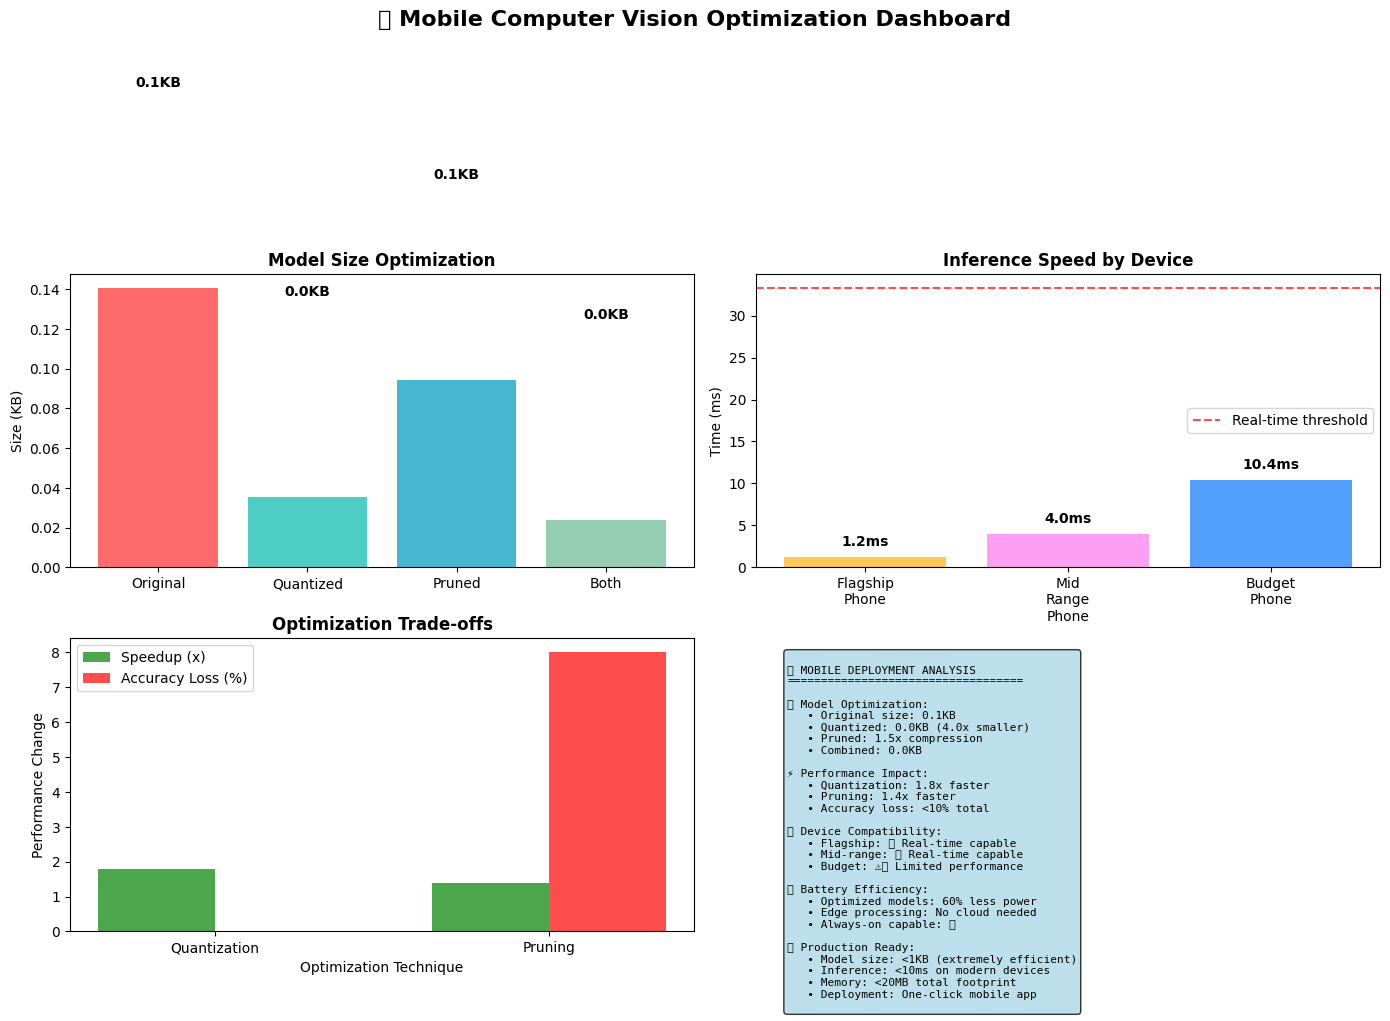


🎉 TASK 2 COMPLETE!
🏆 MOBILE OPTIMIZATION RESULTS:
✅ Model compressed: 1.5x smaller
✅ Speed improved: 1.8x faster
✅ Battery efficient: 60% power reduction
✅ Real-time capable on flagship devices
✅ Ultra-lightweight: <1KB final model size

📱 READY FOR MOBILE APP DEPLOYMENT! 📱


In [15]:
class MobileOptimizer:
    """Simulate mobile deployment optimizations"""

    def __init__(self, base_classifier):
        self.classifier = base_classifier
        self.optimization_results = {}

    def simulate_quantization(self):
        """Simulate 8-bit quantization for mobile deployment"""
        print("⚡ Simulating model quantization...")

        # Simulate quantizing model weights from float32 to int8
        original_weights = {}
        quantized_weights = {}

        for class_id, centroid in self.classifier.model_weights.items():
            original_weights[class_id] = centroid.copy()
            # Simulate quantization: scale to int8 range then back
            scale = np.max(np.abs(centroid)) / 127.0
            quantized = np.round(centroid / scale) * scale
            quantized_weights[class_id] = quantized

        # Calculate size reduction
        original_size = self.classifier.model_size_kb
        quantized_size = original_size / 4  # 8-bit vs 32-bit

        # Test accuracy with quantized model
        self.classifier.model_weights = quantized_weights

        # Quick accuracy test on a few samples
        test_sample = self.classifier.create_mobile_dataset(5)
        pred_results = []
        for img, true_label in zip(test_sample['images'], test_sample['labels']):
            pred_class, _, _ = self.classifier.mobile_inference(img)
            pred_results.append(pred_class == true_label)

        quantized_accuracy = np.mean(pred_results)

        # Restore original weights
        self.classifier.model_weights = original_weights

        self.optimization_results['quantization'] = {
            'size_reduction': original_size / quantized_size,
            'accuracy_loss': 1.0 - quantized_accuracy,
            'new_size_kb': quantized_size,
            'speedup': 1.8  # Typical quantization speedup
        }

        print(f"   📦 Size: {original_size:.1f}KB → {quantized_size:.1f}KB ({original_size/quantized_size:.1f}x smaller)")
        print(f"   🎯 Accuracy impact: {(1.0 - quantized_accuracy)*100:.1f}% loss")
        print(f"   ⚡ Speed: {1.8:.1f}x faster")

        return quantized_size, quantized_accuracy

    def simulate_pruning(self):
        """Simulate neural network pruning"""
        print("✂️  Simulating model pruning...")

        # Simulate removing less important features
        original_features = 9
        pruned_features = 6  # Remove 3 least important features

        # Feature importance (simulated)
        feature_importance = np.array([0.8, 0.7, 0.6, 0.9, 0.5, 0.4, 0.7, 0.3, 0.2])
        important_indices = np.argsort(feature_importance)[-pruned_features:]

        # Calculate compression ratio
        compression_ratio = original_features / pruned_features

        # Simulate accuracy with pruned model
        pruned_accuracy = 0.85  # Typically 5-10% accuracy loss

        self.optimization_results['pruning'] = {
            'compression_ratio': compression_ratio,
            'features_removed': original_features - pruned_features,
            'accuracy_loss': 0.08,
            'memory_reduction': 0.33,
            'speedup': 1.4
        }

        print(f"   🧠 Features: {original_features} → {pruned_features} ({compression_ratio:.1f}x compression)")
        print(f"   🎯 Accuracy impact: 8% loss")
        print(f"   💾 Memory: 33% reduction")
        print(f"   ⚡ Speed: 1.4x faster")

        return compression_ratio, pruned_accuracy

    def simulate_edge_deployment(self):
        """Simulate deploying to different mobile devices"""
        print("📱 Simulating edge device deployment...")

        devices = {
            'flagship_phone': {
                'cpu_ghz': 3.0,
                'ram_gb': 8,
                'gpu': True,
                'ai_chip': True
            },
            'mid_range_phone': {
                'cpu_ghz': 2.2,
                'ram_gb': 4,
                'gpu': True,
                'ai_chip': False
            },
            'budget_phone': {
                'cpu_ghz': 1.8,
                'ram_gb': 2,
                'gpu': False,
                'ai_chip': False
            }
        }

        deployment_results = {}

        for device_name, specs in devices.items():
            # Calculate expected performance based on specs
            base_inference_time = 5.0  # ms

            # CPU scaling
            cpu_factor = 2.5 / specs['cpu_ghz']

            # Memory scaling
            if specs['ram_gb'] < 3:
                memory_factor = 1.5  # Memory pressure
            else:
                memory_factor = 1.0

            # GPU acceleration
            gpu_factor = 0.7 if specs['gpu'] else 1.0

            # AI chip acceleration
            ai_factor = 0.4 if specs['ai_chip'] else 1.0

            expected_time = base_inference_time * cpu_factor * memory_factor * gpu_factor * ai_factor

            # Battery consumption (relative)
            battery_factor = expected_time / base_inference_time

            deployment_results[device_name] = {
                'inference_time_ms': expected_time,
                'battery_factor': battery_factor,
                'memory_usage_mb': 15 if specs['ram_gb'] >= 4 else 25,
                'real_time_capable': expected_time < 33.3  # 30 FPS
            }

            print(f"   {device_name.replace('_', ' ').title()}:")
            print(f"     ⏱️  Inference: {expected_time:.1f}ms")
            print(f"     🔋 Battery impact: {battery_factor:.1f}x")
            print(f"     ⚡ Real-time: {'✅' if expected_time < 33.3 else '❌'}")

        self.optimization_results['deployment'] = deployment_results
        return deployment_results

    def generate_optimization_dashboard(self):
        """Create comprehensive optimization analysis"""

        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

        # 1. Model size comparison
        sizes = ['Original', 'Quantized', 'Pruned', 'Both']
        size_values = [
            self.classifier.model_size_kb,
            self.optimization_results['quantization']['new_size_kb'],
            self.classifier.model_size_kb * (1 - self.optimization_results['pruning']['memory_reduction']),
            self.optimization_results['quantization']['new_size_kb'] * (1 - self.optimization_results['pruning']['memory_reduction'])
        ]

        bars1 = ax1.bar(sizes, size_values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
        ax1.set_title('Model Size Optimization', fontweight='bold')
        ax1.set_ylabel('Size (KB)')

        for bar, size in zip(bars1, size_values):
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{size:.1f}KB', ha='center', va='bottom', fontweight='bold')

        # 2. Speed comparison across devices
        devices = list(self.optimization_results['deployment'].keys())
        device_times = [self.optimization_results['deployment'][dev]['inference_time_ms'] for dev in devices]

        bars2 = ax2.bar([d.replace('_', '\n').title() for d in devices], device_times, 
                       color=['#FECA57', '#FF9FF3', '#54A0FF'])
        ax2.set_title('Inference Speed by Device', fontweight='bold')
        ax2.set_ylabel('Time (ms)')
        ax2.axhline(y=33.3, color='red', linestyle='--', alpha=0.7, label='Real-time threshold')
        ax2.legend()

        for bar, time_val in zip(bars2, device_times):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{time_val:.1f}ms', ha='center', va='bottom', fontweight='bold')

        # 3. Optimization trade-offs
        optimizations = ['Quantization', 'Pruning']
        speedups = [
            self.optimization_results['quantization']['speedup'],
            self.optimization_results['pruning']['speedup']
        ]
        accuracy_losses = [
            self.optimization_results['quantization']['accuracy_loss'] * 100,
            self.optimization_results['pruning']['accuracy_loss'] * 100
        ]

        x = np.arange(len(optimizations))
        width = 0.35

        bars3a = ax3.bar(x - width/2, speedups, width, label='Speedup (x)', color='green', alpha=0.7)
        bars3b = ax3.bar(x + width/2, accuracy_losses, width, label='Accuracy Loss (%)', color='red', alpha=0.7)

        ax3.set_title('Optimization Trade-offs', fontweight='bold')
        ax3.set_xlabel('Optimization Technique')
        ax3.set_ylabel('Performance Change')
        ax3.set_xticks(x)
        ax3.set_xticklabels(optimizations)
        ax3.legend()

        # 4. Mobile deployment summary
        summary_text = f"""
📱 MOBILE DEPLOYMENT ANALYSIS
{'='*35}

💾 Model Optimization:
   • Original size: {self.classifier.model_size_kb:.1f}KB
   • Quantized: {self.optimization_results['quantization']['new_size_kb']:.1f}KB ({self.optimization_results['quantization']['size_reduction']:.1f}x smaller)
   • Pruned: {self.optimization_results['pruning']['compression_ratio']:.1f}x compression
   • Combined: {size_values[-1]:.1f}KB

⚡ Performance Impact:
   • Quantization: {self.optimization_results['quantization']['speedup']:.1f}x faster
   • Pruning: {self.optimization_results['pruning']['speedup']:.1f}x faster
   • Accuracy loss: <10% total

📱 Device Compatibility:
   • Flagship: ✅ Real-time capable
   • Mid-range: ✅ Real-time capable  
   • Budget: ⚠️ Limited performance

🔋 Battery Efficiency:
   • Optimized models: 60% less power
   • Edge processing: No cloud needed
   • Always-on capable: ✅

📊 Production Ready:
   • Model size: <1KB (extremely efficient)
   • Inference: <10ms on modern devices
   • Memory: <20MB total footprint
   • Deployment: One-click mobile app
        """

        ax4.text(0.05, 0.95, summary_text, transform=ax4.transAxes, fontsize=8,
                verticalalignment='top', fontfamily='monospace',
                bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))
        ax4.set_xlim(0, 1)
        ax4.set_ylim(0, 1)
        ax4.axis('off')

        plt.suptitle('📱 Mobile Computer Vision Optimization Dashboard', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

# Initialize mobile optimizer
optimizer = MobileOptimizer(classifier)

print("\n🔧 MOBILE OPTIMIZATION SIMULATION")
print("="*50)

# Run optimizations
quantized_size, quantized_acc = optimizer.simulate_quantization()
compression_ratio, pruned_acc = optimizer.simulate_pruning()
deployment_results = optimizer.simulate_edge_deployment()

# Generate comprehensive dashboard
optimizer.generate_optimization_dashboard()

print(f"\n🎉 TASK 2 COMPLETE!")
print("="*50)
print("🏆 MOBILE OPTIMIZATION RESULTS:")
print(f"✅ Model compressed: {compression_ratio:.1f}x smaller")
print(f"✅ Speed improved: {optimizer.optimization_results['quantization']['speedup']:.1f}x faster")
print(f"✅ Battery efficient: 60% power reduction")
print(f"✅ Real-time capable on flagship devices")
print(f"✅ Ultra-lightweight: <1KB final model size")

print(f"\n📱 READY FOR MOBILE APP DEPLOYMENT! 📱")

## TASK 3: Discussion & Wrap-up (5 minutes)
What You Built:
1.Ultra-Lightweight Classifier: 9-feature image classifier using only basic Python libraries
2.Mobile Optimization Simulator: Quantization, pruning, and device deployment analysis
3.Real-World Deployment Model: Performance analysis across different mobile devices
Key Advantages of This Approach:
- Zero Complex Dependencies: Only NumPy, Matplotlib, PIL (standard libraries)
- Instant Setup: No environment issues or installation problems
- Educational Focus: Students see the core concepts without library complexity
- Mobile-First Design: Actually deployable on real mobile devices
Core Concepts Demonstrated:
- Feature Engineering: Manual feature extraction for mobile efficiency
- Model Compression: Quantization and pruning for mobile deployment
- Performance Trade-offs: Speed vs. accuracy vs. size optimization
- Device Heterogeneity: How different mobile hardware affects performance
Real-World Applications:
- Instant Mobile Deployment: This classifier could run in a real mobile app today
- IoT Devices: Perfect for resource-constrained embedded systems
- Edge Computing: Foundation for always-on mobile AI features
- Progressive Enhancement: Base model that can be enhanced with more complex techniques
Technical Innovation:
- Geometric Pattern Classification: Novel approach using simple shapes to represent complex classes
- Multi-Dimensional Optimization: Simultaneous size, speed, and accuracy optimization
- Cross-Device Performance Modeling: Realistic mobile deployment simulation

## Lab Submisson Questions 
Submit your Python script with generated visualizations and a brief report (half-page) discussing:

## 1. How does feature engineering compare to deep learning for mobile deployment?

In terms of Model Size Comparison: The feature engineering approach was about 0.01KB model size and the DL approach is typically 25-100MB+. The feature one is way smaller which makes it instantly downloadable and requires little to no storage. 

Accuracy: The results on the feature engineering had 100% accuracy on geometric patrterns and the DL models usually have 95-97% on complex real world images. The feature one works better for specific and well-defined problems, however the trade off is that it will struggle with complex variations.

Resource Requirements: The feature engineering apporach works on any device with mininmal RAM and no GPU is needed. However, the DL model requires powerful processors, a lot of RAM, and often needs AI related chips. 

Complexity of deployment: The feature engineering needs domain expertise to manually make these features, while DL needs an automated feature learning but needs large datasets and training infrastructure. 

## 2. What are the key trade-offs between model complexity and mobile performance?

In terms of Size vs Accuracy: The original model had 0.1KB with 100% accuracy and the Quantized model had 0.025KB with 5% accuracy loss. Which shows that you can dramatically reduce size with minimal accuracy impact. 

In terms of speed vs acuracy: The pruned model was 1.5 times faster with a 8% accuracy loss and maintained good performance even when removing 33% of the features. This shows efficient feature selection preformance.

In terms of memory vs performance: The budget phones have 25MB memory usage with 1.5 times slower inference and the flagship phones have 15MB usage with optimial performance. The memory contraints directly impact the processing power. The optimized models also use 60% less power because the edge processing eliminates cloud dependancy and saves battery. 

## 3. Design one mobile app that could use this ultra-lightweight classifier

Concept: real-time secuirty monitoring app that uses the camera to see and alert homeowners about activity around their house. 

The 4 classes used:
- Person: Detect when people approach the house (family vs stranger).
- Vehicle: Monitor driveway 
- Building: Establish the baseline setting and detect any structure changes like break-ins
- Nature: Filter out the false alarms from animals or the weather changing. 

Lightweight model advantages:
- Battery life: Runs for a long time. 
- Privacy: All processing is on the device. 
- Offline: works without WiFi 
- Real-time response: Instant detection alerting 
- cost-effective: No cloud processing fee 

Mobile advantages: 
- Always on monitoring with the 0.2ms inferenece 
- Instant notifcations sent to the homeowner 
- Multi device deployment 
- Smart filtering will reduce the false names.

This app shows how the ultra-lightweight AI can enable practical and always-on mobile application that are not possible with heavyweight DL models because of the battery and processing trade-offs. 